In [1]:
import numpy as np
import matplotlib.pyplot as plt

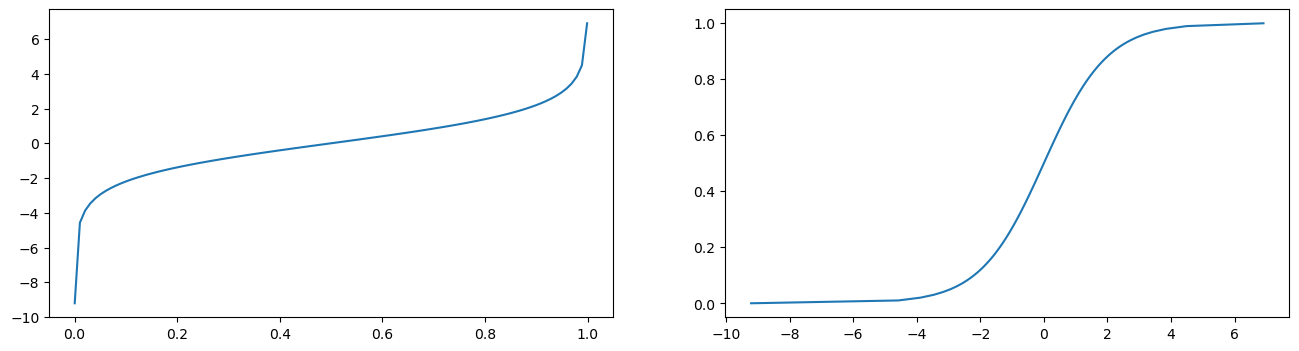

In [4]:
p = np.linspace(0.0001, 0.999, 100)

odds = p / (1 - p)
logit = np.log(odds)

sigmoid = 1 / (1 + np.exp(-logit))

fig = plt.figure(figsize=(16, 4))
plt.subplot(1,2, 1)
plt.plot(p, logit)

plt.subplot(1,2, 2)
plt.plot(logit, sigmoid)

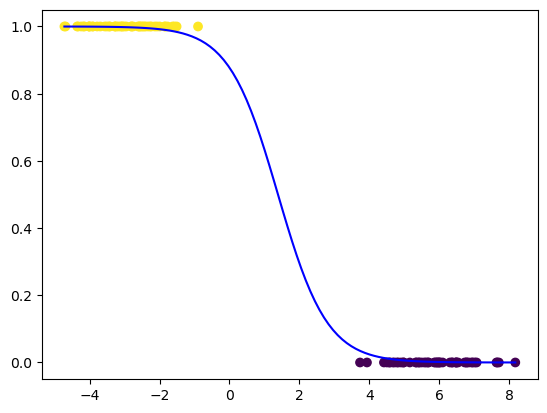

In [37]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=1)

plt.scatter(X, y, c=y)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X,y)

X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
p = lg.predict_proba(X_curve)[:, -1]

plt.plot(X_curve, p, 'b-')

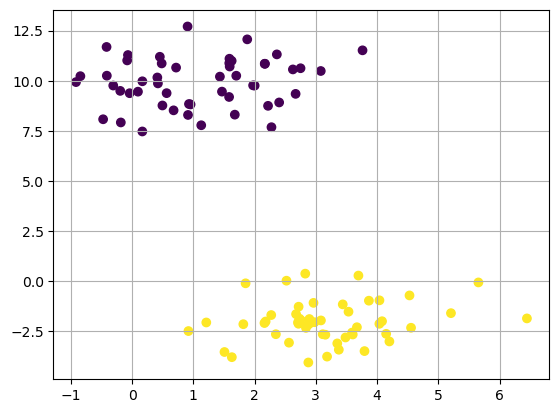

In [41]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2)

plt.scatter(X[:, 0], X[:, 1], c=y)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X,y)

plt.grid()

In [42]:
import mylib as my

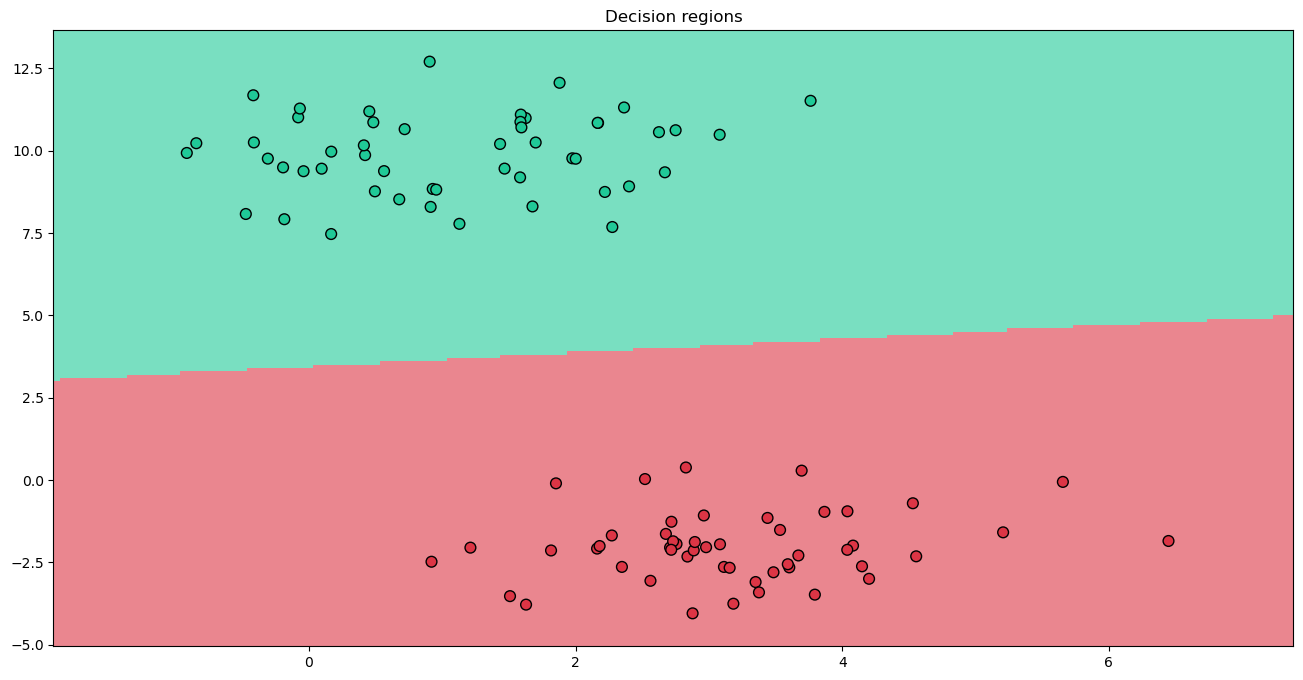

In [43]:
my.plot_decision_regions(X, y, lg)

## MLP

In [47]:
import pandas as pd

df = pd.read_csv(
    my.download_zip_and_open_a_file('http://archive.ics.uci.edu/static/public/212/vertebral+column.zip', 'column_2C_weka.arff'),
    skiprows=12,
    header=None
)
df.head()

,0,1,2,3,4,5,6
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [48]:
df[df.columns[-1]] = df[df.columns[-1]].apply(lambda y: 0 if y == 'Normal' else 1)
df.head()

,0,1,2,3,4,5,6
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [50]:
df[df.columns[-1]].value_counts()

1    210
0    100
Name: 6, dtype: int64

In [51]:
X, y, feature, target = my.from_dataframe(df)

In [52]:
X.shape, y.shape

((310, 6), (310,))

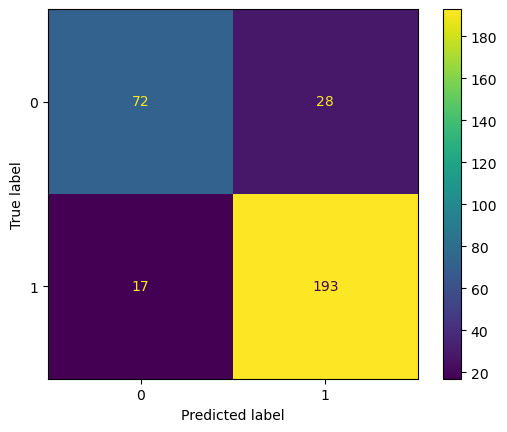

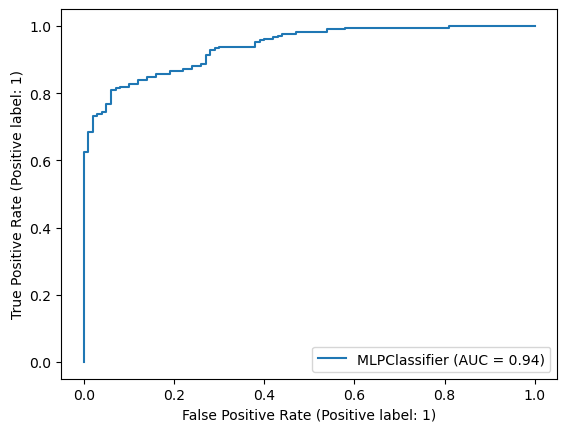

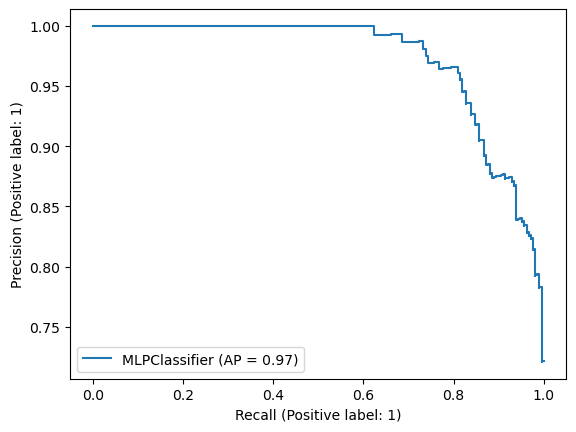

In [54]:
#wihtout normalization

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=200).fit(X, y)

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

ConfusionMatrixDisplay.from_estimator(mlp, X, y)

RocCurveDisplay.from_estimator(mlp, X, y)

PrecisionRecallDisplay.from_estimator(mlp, X, y)

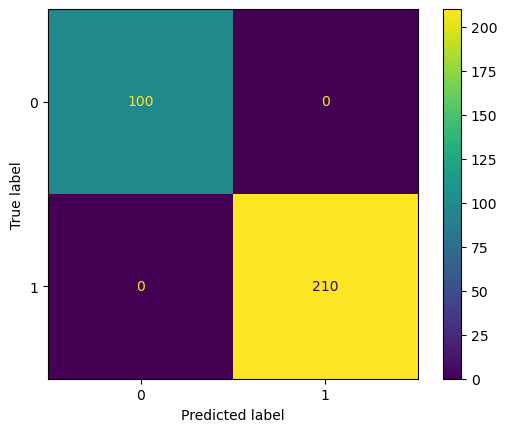

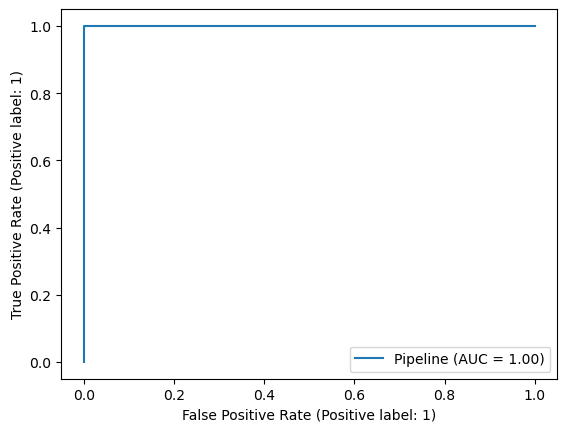

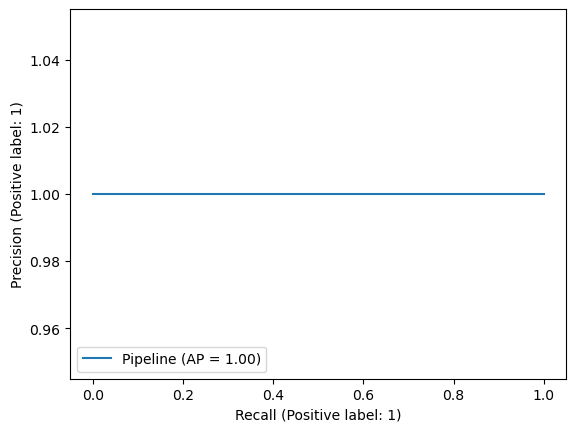

In [60]:
#wiht normalization

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler #MaxSclaer

model = make_pipeline(StandardScaler(),
                      MLPClassifier(max_iter=500, hidden_layer_sizes=[100, 200, 100])
                     ).fit(X, y)

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y)
RocCurveDisplay.from_estimator(model, X, y)
PrecisionRecallDisplay.from_estimator(model, X, y)

## regression

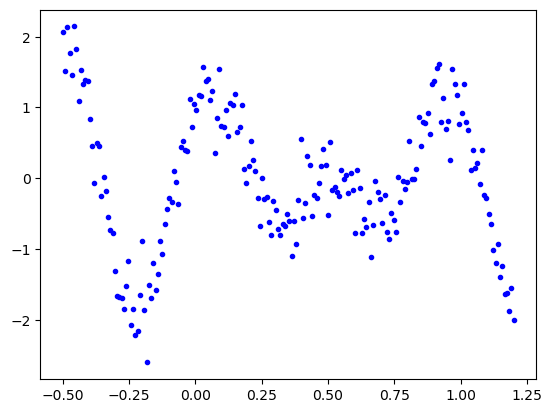

In [63]:
X = np.linspace(-0.5, 1.2, 200)
y = np.sin(3 * np.pi * X) + np.cos(4 * np.pi * X) + np.random.randn(200) * .3


X = X.reshape(-1,1)
plt.plot(X, y, 'b.')

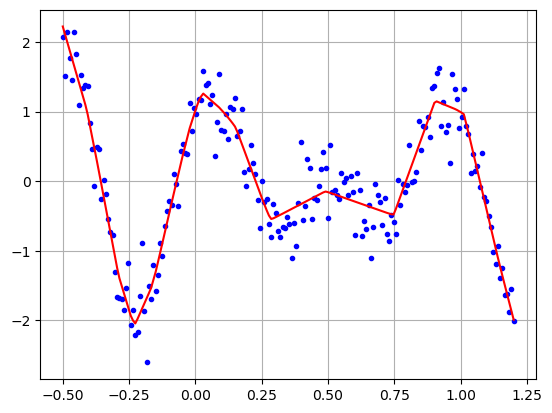

In [66]:
from sklearn.neural_network import MLPRegressor

model = make_pipeline(StandardScaler(),
                      MLPRegressor(max_iter=500, hidden_layer_sizes=[100, 200, 100])
                     ).fit(X, y)

plt.plot(X, y, 'b.')
plt.plot(X, model.predict(X), 'r-')
plt.grid()

## TensorFlow

In [67]:
import tensorflow as tf

In [74]:
#rank 0 tensor
tf.constant(3)
np.array(3)

array(3)

In [75]:
#rank 1 tensor
np.array([2,3,5])
tf.constant([2,3,5])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 5])>

In [76]:
np.arange(1, 100)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [77]:
tf.range(1, 100, delta=2)

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])>

In [79]:
tf.linspace(-4, 4, 20)

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ])>

In [80]:
np.ones(100)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [81]:
tf.ones(shape=(3,4,5))

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]], dtype=float32)>

In [86]:
tf.one_hot([0, 1, 2, 3], depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [87]:
tf.random.normal(shape=(2,3,4))

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[ 0.42812106,  0.67334676, -1.1859107 ,  0.6046894 ],
        [ 0.50202787, -1.1570911 ,  2.5633688 , -1.8364989 ],
        [-0.7698214 ,  1.5045208 ,  0.58301187, -0.3958183 ]],

       [[ 0.7437787 , -0.10229075, -0.82463086, -1.2950892 ],
        [ 0.25537658, -0.5073292 ,  0.09406431, -0.4383072 ],
        [-2.47381   , -1.8263012 ,  0.14044432, -0.855572  ]]],
      dtype=float32)>

In [89]:
##previous have been 'constant' variables (important for gradients)

tf.Variable(tf.random.normal(shape=(2,3,4)))

<tf.Variable 'Variable:0' shape=(2, 3, 4) dtype=float32, numpy=
array([[[-0.01739028, -0.03847794,  0.62888664,  0.11907863],
        [-0.91932577,  0.15342063,  1.2474983 , -1.0933168 ],
        [ 1.6369977 ,  0.03462505, -0.29802358, -0.33946007]],

       [[-0.5289781 ,  0.34892502, -0.37825665,  0.73026264],
        [-1.1083136 , -0.642139  ,  0.57324827,  0.02524872],
        [ 0.86766326, -0.09481578, -0.09853607,  0.40319556]]],
      dtype=float32)>

function:

$$ f(x) = cos^3(x) + sin(x) $$

derivative:

$$ f(x)\prime = -3 * sin(x) + cos(x) $$

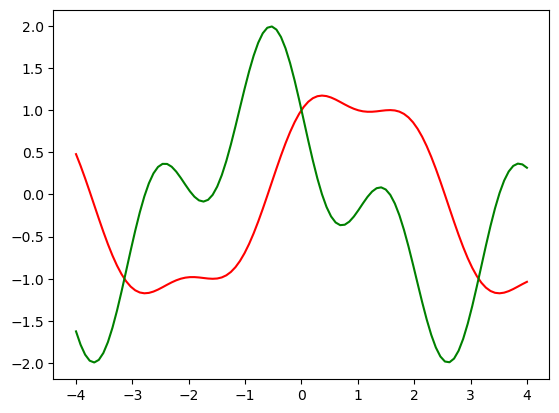

In [96]:
X = np.linspace(-4, 4, 100)
y = np.cos(X)**3 + np.sin(X)
y_p = -3 * np.cos(X)**2 * np.sin(X) + np.cos(X)

plt.plot(X, y, 'r-')
plt.plot(X, y_p, 'g-')

In [97]:
X_t = tf.Variable(X)

with tf.GradientTape() as tape:
    y_t = tf.cos(X_t)**3 + tf.sin(X_t)
    
gradient = tape.gradient(y_t, X_t)

gradient

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([-1.62367518, -1.78136966, -1.8992474 , -1.9709055 , -1.99222084,
       -1.96159077, -1.88002913, -1.75111209, -1.58077673, -1.37698435,
       -1.14926787, -0.90818993, -0.66474314, -0.42972745, -0.21314102,
       -0.0236199 ,  0.13204066,  0.24925566,  0.32588902,  0.36234765,
        0.36152581,  0.32860299,  0.27070754,  0.19646584,  0.11546357,
        0.03765095, -0.02727326, -0.07046249, -0.08447277, -0.06373007,
       -0.00488739,  0.09294977,  0.22814279,  0.39658913,  0.59193742,
        0.80593605,  1.02889507,  1.25023438,  1.45908651,  1.64491855,
        1.79813721,  1.91064151,  1.97629094,  1.99126174,  1.95427037,
        1.86665125,  1.73228417,  1.55737545,  1.35010581,  1.1201653 ,
        0.87820244,  0.63521979,  0.401951  ,  0.1882558 ,  0.00256803,
       -0.14857103, -0.26086705, -0.33249414, -0.36417065, -0.35908518,
       -0.32267717, -0.26228524, -0.18668402, -0.10553676, -0.02879601,
        0.033912

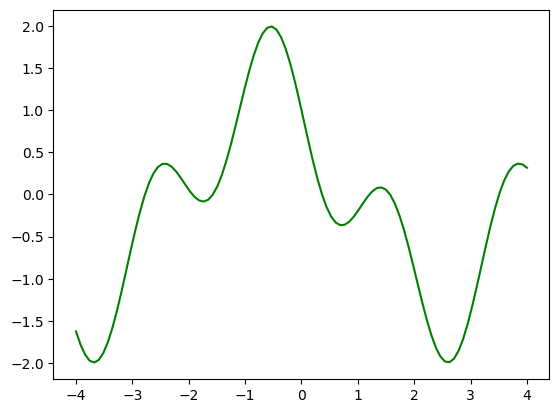

In [99]:
plt.plot(X, gradient, 'g-')